In [5]:
# Import required moduls/libs for our model
import numpy as np          # linear algebra
import pandas as pd         # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dropout, Activation
from keras.layers import Conv2D, BatchNormalization, MaxPool2D, Flatten, \
     Dense, Input, Activation, Dropout, GlobalAveragePooling2D, AveragePooling2D
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Model
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import cv2
from cv2 import imread, resize # manipulating the images
from tensorflow.keras.optimizers import Adam
import os
from keras.layers import Dense, Activation

In [ ]:
os.chdir(r'C:\Users\ankit\Documents\Ankita\UD\Sem 3\Big Data and Cloud Computing\dataverse_files')
cancer = pd.read_csv('HAM10000_metadata.csv')

In [ ]:
cancer.info()

cancer.head()
cancer.isna().sum()

cancer.fillna({'age': np.mean(cancer['age'])}, inplace=True)

cancer.isna().sum().sum()

cancer['dx'].value_counts()

cancer['dx_type'].value_counts()

In [ ]:
dx_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

In [ ]:
cancer['diagnosis'] = cancer['dx'].map(dx_dict.get) 

In [ ]:
cancer['diagnosis'].value_counts()

In [ ]:
import os
from pathlib import Path
import glob

In [ ]:
image_paths=[]
for part in ("part_1","part_2"):
    image_paths+=glob.glob(r"C:\Users\ankit\Documents\Ankita\UD\Sem 3\Big Data and Cloud Computing\dataverse_files\HAM10000_images_"+part+"\*")


In [ ]:
image_ids_n_paths = {os.path.splitext(os.path.basename(path))[0]:path for path in image_paths}


In [ ]:
cancer['path']=cancer['image_id'].map(image_ids_n_paths)

In [ ]:
cancer['cancer_type'] = cancer['dx']

In [ ]:
cancer.info()

In [ ]:
##################################
# Separating images and putting them in different folder
##################################

In [ ]:
import os
import shutil
import pandas as pd

In [ ]:
os.chdir(r'C:\Users\ankit\Documents\Ankita\UD\Sem 3\Big Data and Cloud Computing')
cancer = pd.read_csv('cancer_data.csv')

In [ ]:
# Group the DataFrame by the "dx" column
cancer_groups = cancer.groupby('dx')

In [ ]:
# Create a dictionary to store DataFrames for each group
grouped_dataframes = {}

In [ ]:
# Iterate through the groups and store them in the dictionary
for group_name, group_df in cancer_groups:
    grouped_dataframes[group_name] = group_df

In [ ]:
# Now, you can access each group's DataFrame by its name (skin cancer type)
# For example, to access the "nv" group:
nv_group = grouped_dataframes.get('nv')

In [ ]:
# Similarly, you can access other groups (e.g., "mel", "bkl", etc.) using their names.

# If you want to save each group's DataFrame to a separate CSV file, you can do something like this:
for group_name, group_df in grouped_dataframes.items():
    group_df.to_csv(f'{group_name}_data.csv', index=False)

In [ ]:
##################################
# Separating images and putting them in different folder
##################################

In [ ]:
import os
import shutil
import pandas as pd

In [ ]:
# Load the CSV file into a DataFrame
cancer = pd.read_csv('cancer_data.csv')

In [ ]:
# Define the source and destination paths for two source directories
source_dir1 = r'C:\Users\ankit\Documents\Ankita\UD\Sem 3\Big Data and Cloud Computing\dataverse_files\HAM10000_images_part_1'
source_dir2 = r'C:\Users\ankit\Documents\Ankita\UD\Sem 3\Big Data and Cloud Computing\dataverse_files\HAM10000_images_part_2'
destination_dir = r'C:\Users\ankit\Documents\Ankita\UD\Sem 3\Big Data and Cloud Computing\dataverse_files\bcc_images\\'


In [ ]:
# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

In [ ]:
# Filter the DataFrame to get rows with skin type 'df'
bcc_images = cancer[cancer['dx'] == 'bcc']

In [ ]:
# Iterate through the 'df' images in both source directories and copy them to the destination folder
for fname in bcc_images['image_id']:
    source_path1 = os.path.join(source_dir1, f'{fname}.jpg')
    source_path2 = os.path.join(source_dir2, f'{fname}.jpg')
    if os.path.exists(source_path1):
        shutil.copy(source_path1, os.path.join(destination_dir, f'{fname}.jpg'))
    elif os.path.exists(source_path2):
        shutil.copy(source_path2, os.path.join(destination_dir, f'{fname}.jpg'))

In [ ]:
############## FOR BKL #############################

In [ ]:
import os
import shutil
import pandas as pd

# Load the CSV file into a DataFrame
cancer = pd.read_csv('cancer_data.csv')

# Define the source and destination paths for the two source directories
source_dir1 = r'C:\Users\ankit\Documents\Ankita\UD\Sem 3\Big Data and Cloud Computing\dataverse_files\HAM10000_images_part_1'
source_dir2 = r'C:\Users\ankit\Documents\Ankita\UD\Sem 3\Big Data and Cloud Computing\dataverse_files\HAM10000_images_part_2'
destination_dir_bkl1 = r'C:\Users\ankit\Documents\Ankita\UD\Sem 3\Big Data and Cloud Computing\dataverse_files\bkl_1\\'
destination_dir_bkl2 = r'C:\Users\ankit\Documents\Ankita\UD\Sem 3\Big Data and Cloud Computing\dataverse_files\bkl_2\\'

# Create the destination directories if they don't exist
os.makedirs(destination_dir_bkl1, exist_ok=True)
os.makedirs(destination_dir_bkl2, exist_ok=True)

# Filter the DataFrame to get rows with skin type 'bkl'
bkl_images = cancer[cancer['dx'] == 'bkl']

# Divide 'bkl' images into 'bkl_1' and 'bkl_2' based on the specified counts
bkl1_count = 500
bkl2_count = 599

for idx, fname in enumerate(bkl_images['image_id']):
    source_path1 = os.path.join(source_dir1, f'{fname}.jpg')
    source_path2 = os.path.join(source_dir2, f'{fname}.jpg')
    if os.path.exists(source_path1):
        if idx < bkl1_count:
            shutil.copy(source_path1, os.path.join(destination_dir_bkl1, f'{fname}.jpg'))
        else:
            shutil.copy(source_path1, os.path.join(destination_dir_bkl2, f'{fname}.jpg'))
    elif os.path.exists(source_path2):
        if idx < bkl1_count:
            shutil.copy(source_path2, os.path.join(destination_dir_bkl1, f'{fname}.jpg'))
        else:
            shutil.copy(source_path2, os.path.join(destination_dir_bkl2, f'{fname}.jpg'))

print(f'{bkl1_count} "bkl" images copied to {destination_dir_bkl1}')
print(f'{bkl2_count} "bkl" images copied to {destination_dir_bkl2}')


In [ ]:
########################### MEL #####################

In [ ]:
import os
import shutil
import pandas as pd

# Load the CSV file into a DataFrame
cancer = pd.read_csv('cancer_data.csv')

# Define the source and destination paths for the two source directories
source_dir1 = r'C:\Users\ankit\Documents\Ankita\UD\Sem 3\Big Data and Cloud Computing\dataverse_files\HAM10000_images_part_1'
source_dir2 = r'C:\Users\ankit\Documents\Ankita\UD\Sem 3\Big Data and Cloud Computing\dataverse_files\HAM10000_images_part_2'

# Create a base destination directory for 'mel' type images
base_destination_dir_mel = r'C:\Users\ankit\Documents\Ankita\UD\Sem 3\Big Data and Cloud Computing\dataverse_files\mel_images\\'

# Create the destination directories if they don't exist
os.makedirs(base_destination_dir_mel, exist_ok=True)

# Filter the DataFrame to get rows with skin type 'mel'
mel_images = cancer[cancer['dx'] == 'mel']

# Initialize variables to count the images
total_images = len(mel_images)
images_copied = 0
folder_count = 1

# Set the maximum images per folder
max_images_per_folder = 500

# Iterate through 'mel' images and copy them to subdirectories
for fname in mel_images['image_id']:
    source_path1 = os.path.join(source_dir1, f'{fname}.jpg')
    source_path2 = os.path.join(source_dir2, f'{fname}.jpg')
    if os.path.exists(source_path1):
        source_path = source_path1
    else:
        source_path = source_path2

    destination_folder = os.path.join(base_destination_dir_mel, f'mel_{folder_count}')

    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)
    
    destination_path = os.path.join(destination_folder, f'{fname}.jpg')

    shutil.copy(source_path, destination_path)

    images_copied += 1

    if images_copied >= max_images_per_folder:
        folder_count += 1
        images_copied = 0

print(f'{total_images} "mel" images copied to subdirectories under {base_destination_dir_mel}')


In [ ]:
############################ NV ##################################

In [ ]:
import os
import shutil
import pandas as pd

# Load the CSV file into a DataFrame
cancer = pd.read_csv('cancer_data.csv')

# Define the source and destination paths for the two source directories
source_dir1 = r'C:\Users\ankit\Documents\Ankita\UD\Sem 3\Big Data and Cloud Computing\dataverse_files\HAM10000_images_part_1'
source_dir2 = r'C:\Users\ankit\Documents\Ankita\UD\Sem 3\Big Data and Cloud Computing\dataverse_files\HAM10000_images_part_2'

# Create a base destination directory for 'nv' type images
base_destination_dir_nv = r'C:\Users\ankit\Documents\Ankita\UD\Sem 3\Big Data and Cloud Computing\dataverse_files\nv_images\\'

# Create the destination directories if they don't exist
os.makedirs(base_destination_dir_nv, exist_ok=True)

# Filter the DataFrame to get rows with skin type 'nv'
nv_images = cancer[cancer['dx'] == 'nv']

# Initialize variables to count the images
total_images = len(nv_images)
images_copied = 0
folder_count = 1

# Set the maximum images per folder
max_images_per_folder = 500

# Iterate through 'nv' images and copy them to subdirectories
for fname in nv_images['image_id']:
    source_path1 = os.path.join(source_dir1, f'{fname}.jpg')
    source_path2 = os.path.join(source_dir2, f'{fname}.jpg')
    if os.path.exists(source_path1):
        source_path = source_path1
    else:
        source_path = source_path2

    destination_folder = os.path.join(base_destination_dir_nv, f'nv_{folder_count}')

    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)
    
    destination_path = os.path.join(destination_folder, f'{fname}.jpg')

    shutil.copy(source_path, destination_path)

    images_copied += 1

    if images_copied >= max_images_per_folder:
        folder_count += 1
        images_copied = 0

print(f'{total_images} "nv" images copied to subdirectories under {base_destination_dir_nv}')


In [ ]:
######################### CONVERTING TO JSON TYPE FOR BATCH PREDICTING ###########################

In [4]:
import os
import json
from PIL import Image

# Specify the folder path containing JPEG images
folder_path = r'C:\Users\ankit\Documents\Ankita\UD\Sem 3\Big Data and Cloud Computing\dataverse_files\ISIC2018_Task3_Test_Images\ISIC2018_Task3_Test_Images'




# Create an empty list to store image information
image_info_list = []

# Iterate through the files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):
        file_path = os.path.join(folder_path, filename)
        with Image.open(file_path) as img:
            width, height = img.size
        image_info = {
            "filename": filename,
            "file_path": file_path,
            "width": width,
            "height": height
        }
        image_info_list.append(image_info)

# Define the name of the JSON file to save
json_file = "image_info.json"

# Write the image information to the JSON file
with open(json_file, "w") as json_output:
    json.dump(image_info_list, json_output, indent=4)

# Print the path where the JSON file was saved
print(f"Image information saved to {json_file}")


Image information saved to image_info.json


In [6]:
############################################ BELOW CODE IS FOR CALCULATING THE COUNT AND CONFIDENCE ON THE BATCH PREDICTION ##########

In [15]:
label_counts=pd.read_csv(r"C:\Users\ankit\Downloads\results.csv")

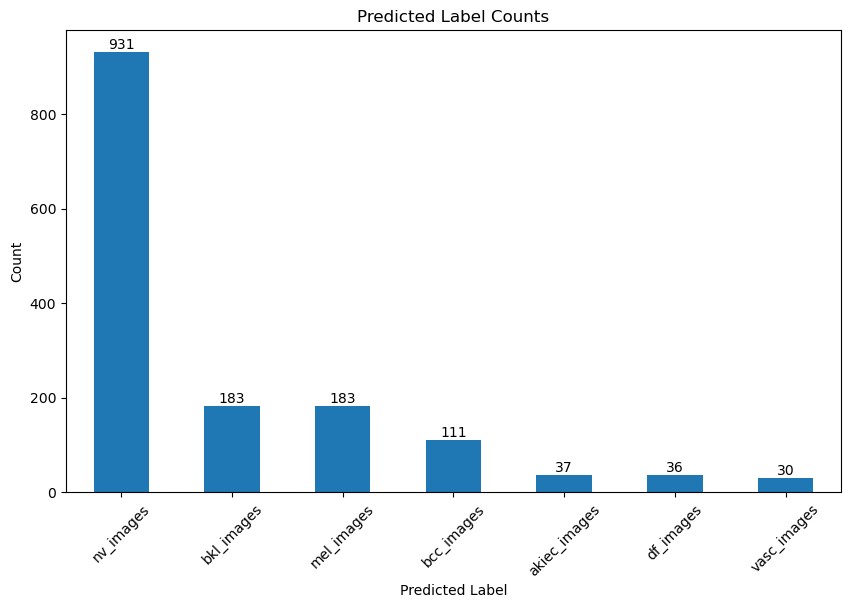

In [16]:
import matplotlib.pyplot as plt

# Group the data by "predicted_label" and count occurrences
label_counts = label_counts['predicted_label'].value_counts()

# Create a bar graph to visualize the counts
plt.figure(figsize=(10, 6))
ax = label_counts.plot(kind='bar')
plt.title('Predicted Label Counts')
plt.xlabel('Predicted Label')
plt.ylabel('Count')

# Annotate each bar with its count
for i, v in enumerate(label_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Show the bar graph
plt.xticks(rotation=45)
plt.show()


In [11]:
import pandas as pd

# Load data from a CSV file into a DataFrame
results_df = pd.read_csv(r"C:\Users\ankit\Downloads\results.csv")


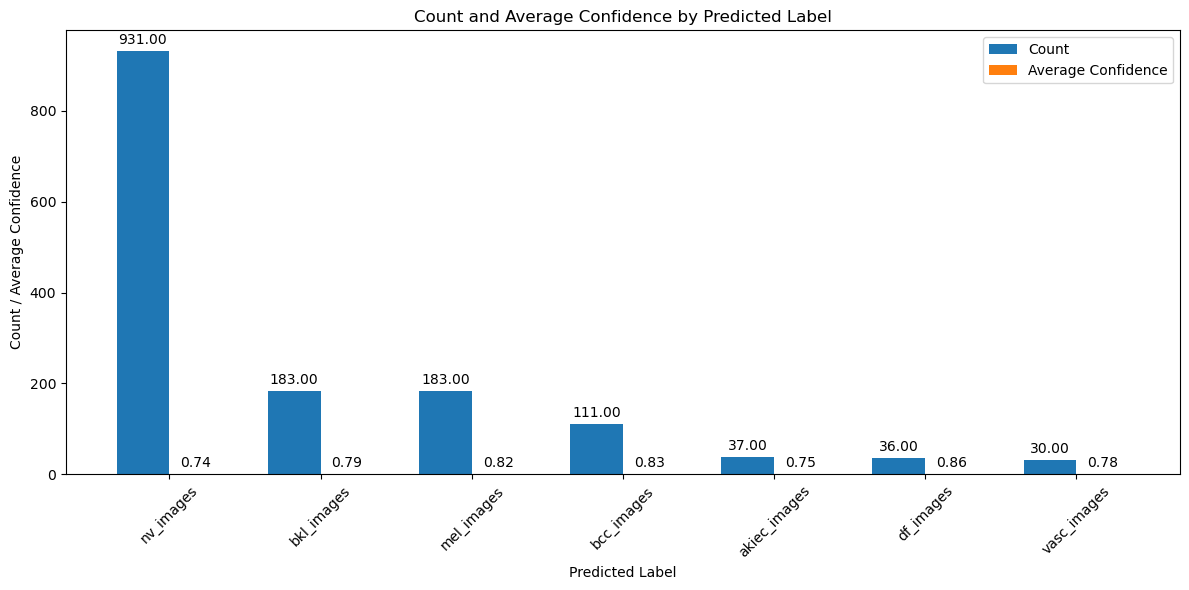

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Group the data by "predicted_label" and calculate count and average confidence
label_counts = results_df['predicted_label'].value_counts()
label_avg_confidence = results_df.groupby('predicted_label')['confidence'].mean()

# Create a list of unique labels
unique_labels = label_counts.index

# Set the width of the bars and their positions
width = 0.35
x = np.arange(len(unique_labels))

# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot count of predicted labels
rects1 = ax.bar(x - width/2, label_counts, width, label='Count')

# Plot average confidence
rects2 = ax.bar(x + width/2, label_avg_confidence, width, label='Average Confidence')

# Label the x-axis
ax.set_xticks(x)
ax.set_xticklabels(unique_labels)
ax.set_xlabel('Predicted Label')

# Label the y-axes
ax.set_ylabel('Count / Average Confidence')

# Add a legend
ax.legend()

# Annotate the bars with their values
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3),
                textcoords="offset points", ha='center', va='bottom')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Set a title for the graph
plt.title('Count and Average Confidence by Predicted Label')

# Show the graph
plt.tight_layout()
plt.show()


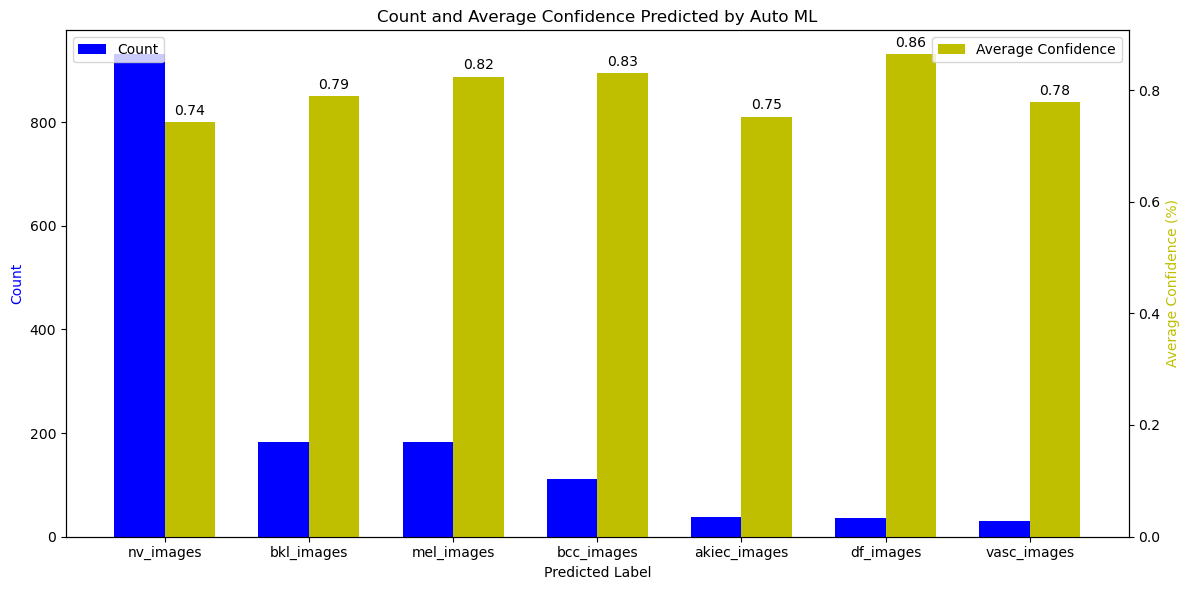

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Group the data by "predicted_label" and calculate count and average confidence
label_counts = results_df['predicted_label'].value_counts()
label_avg_confidence = results_df.groupby('predicted_label')['confidence'].mean()

# Create a list of unique labels
unique_labels = label_counts.index

# Set the width of the bars and their positions
width = 0.35
x = np.arange(len(unique_labels))

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot count of predicted labels on the first y-axis
rects1 = ax1.bar(x - width/2, label_counts, width, label='Count', color='b')
ax1.set_xlabel('Predicted Label')
ax1.set_ylabel('Count', color='b')

# Create the second y-axis for average confidence
ax2 = ax1.twinx()
rects2 = ax2.bar(x + width/2, label_avg_confidence, width, label='Average Confidence', color='y')
ax2.set_ylabel('Average Confidence (%)', color='y')

# Label the x-axis
ax1.set_xticks(x)
ax1.set_xticklabels(unique_labels)

# Annotate the bars with their values
for rect, avg_confidence in zip(rects2, label_avg_confidence):
    height = rect.get_height()
    ax2.annotate(f'{avg_confidence:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3),
                textcoords="offset points", ha='center', va='bottom')

# Add a legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Set a title for the graph
plt.title('Count and Average Confidence Predicted by Auto ML')

# Show the graph
plt.tight_layout()
plt.show()
